### 为什么使用测试数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

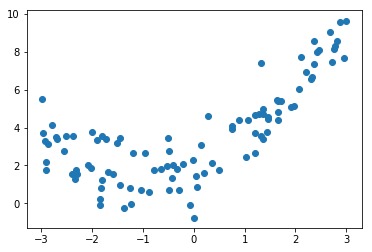

In [3]:
plt.scatter(x, y)
plt.show()

### 过拟合

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg",lin_reg )
    ])

### degree = 100, 过拟合, 模型的泛化能力差

In [18]:
from sklearn.metrics import mean_squared_error

poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6880004678712686

In [19]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

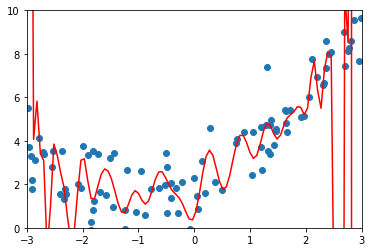

In [20]:
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

### 查看 lin_reg 的coef_ 数据, 发现其中有一些数据很大或很小

In [21]:
lin_reg.coef_ 

array([ 1.21097006e+12,  1.19198819e+01,  1.78867904e+02, -2.95987019e+02,
       -1.79531579e+04, -1.54151064e+04,  8.34384008e+05,  8.19758499e+05,
       -2.23628081e+07, -1.44767967e+07,  3.87211849e+08,  1.13415788e+08,
       -4.61600837e+09, -1.25028833e+08,  3.93150842e+10, -5.47613295e+09,
       -2.44176507e+11,  5.46306491e+10,  1.11421150e+12, -2.76412491e+11,
       -3.71329570e+12,  8.55468251e+11,  8.80961399e+12, -1.60750401e+12,
       -1.39204217e+13,  1.49444135e+12,  1.19236839e+13,  2.47521688e+11,
        4.42430553e+11, -1.64287100e+12, -1.05153908e+13, -1.80895216e+11,
        3.00207361e+12,  2.75578358e+12,  8.74123180e+12, -1.36695737e+12,
       -1.22670880e+12, -7.00478229e+11, -8.24896132e+12, -8.66309669e+11,
       -2.75689072e+12,  1.39629460e+12,  6.26144462e+12, -3.47974176e+11,
        6.29124500e+12,  1.33767267e+12, -6.11898796e+11,  2.92306225e+11,
       -6.59758602e+12, -1.85664319e+12, -4.13408892e+12, -9.72006661e+11,
       -3.99038794e+11, -

train test split 的意义

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### 1, 线性回归

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

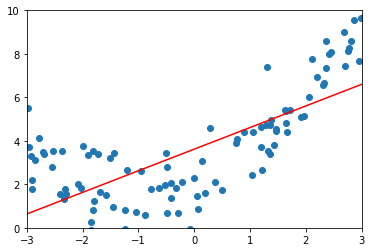

In [10]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = lin_reg.predict(X_plot)
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

### 2, 多项式回归, degree = 2

In [11]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.80356410562979

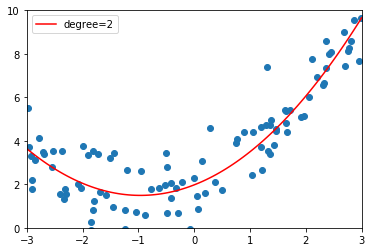

In [12]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly2_reg.predict(X_plot)
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r',label="degree=2")
plt.axis([-3, 3, 0, 10])
plt.legend() #图例
plt.show()

### 3, 多项式回归, degree = 10, 大于原方程的degree, 会出现过拟合

In [13]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150768

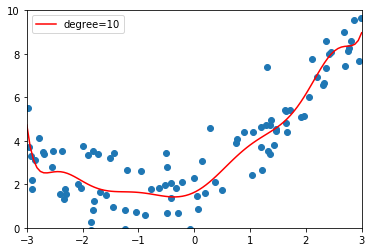

In [14]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly10_reg.predict(X_plot)
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r',label="degree=10")
plt.axis([-3, 3, 0, 10])
plt.legend() #图例
plt.show()

### 3, 多项式回归, degree = 100, 大于原方程的degree, 会出现过拟合

In [15]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

14075796434.50641

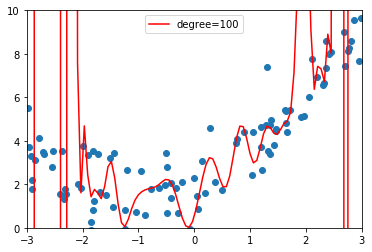

In [16]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r',label="degree=100")
plt.axis([-3, 3, 0, 10])
plt.legend() #图例
plt.show()